<a href="https://colab.research.google.com/github/JL-plusUltra/DataScience/blob/main/MVL_NLP_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import iqr 
from scipy import stats

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import math
from pprint import pprint
import seaborn as sns
import tensorflow as tf
import string
from tensorflow.keras.layers import TextVectorization
import re
import nltk
nltk.download('vader_lexicon')

from nltk import word_tokenize
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import numpy as np
# Import stopwords with nltk.
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
def softmax(h):
  return (np.exp(h.T)/np.sum(np.exp(h), axis=1)).T

def cross_entropy(Y, P_hat):
  return -(1/len(Y))*np.sum(np.sum(Y*np.log(P_hat),axis=1),axis=0)

def accuarcy(y, y_hat):
  return np.mean(y==y_hat)

def indices_to_one_hot(data, nb_classes):
  targets = np.array(data).reshape(-1)
  return np.eye(nb_classes)[targets]


In [ ]:
class MVLogisticRegression():

  def __init__(self,thresh=0.5):
    self.thresh = thresh

  def __forward__(self,X):
    return softmax(X@self.W + self.B)

  def fit(self, X, y, eta=2e-1, epochs=1e3, show_curve=False):
    epochs = int(epochs)
    N,D = X.shape
    K= len(np.unique(y))
    y_values= np.unique(y, return_index=False)
    Y= indices_to_one_hot(y, K).astype(int)

    self.W=np.random.randn(D,K)
    self.B = np.random.randn(1,K)

    J= np.zeros(int(epochs))

    for epoch in range(epochs):
      P_hat= self.__forward__(X)
      J[epoch]=cross_entropy(Y, P_hat)

      self.W -=  eta*(1/N)*X.T@(P_hat-Y)
      self.B -= eta*(1/N)*np.sum(P_hat-Y,axis=0)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  

  def predict(self, X):
    return np.argmax(self.__forward__(X), axis=1)

In [ ]:
sentence = input("Write your sentence here :")

Write your sentence here :What a cute dog.


In [ ]:
sentence

'You scurvy dog!'

In [ ]:
###################### Load noisy words #############################
data = pd.read_csv('/content/drive/MyDrive/jesse lopez - UglyWords1 - Sheet1.csv')

In [ ]:
############################ Clean sentance structure #################################
my_text = pd.read_csv('/content/drive/MyDrive/jesse lopez - UglyWords1 - Sheet1.csv')
my_text['string'] = my_text['string'].str.replace('http\S+|www.\S+', '', case=False)
my_text = my_text.iloc[:,2]
my_text.head(5)

0                  *screams in 25 different languages*
1    Families to sue over Legionnaires: More than 4...
2    Pandemonium In Aba As Woman Delivers Baby With...
3    My emotions are a train wreck. My body is a tr...
4    Alton brown just did a livestream and he burne...
Name: string, dtype: object

In [ ]:
############################## Create sentiment polarity from text ######################
sia = SIA()

results = []

for line in data['string']:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.0,
  'headline': '*screams in 25 different languages*',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.6249,
  'headline': 'Families to sue over Legionnaires: More than 40 families affected by the fatal '
              "outbreak of Legionnaires' disea... http://t.co/ZA4AXFJSVB",
  'neg': 0.242,
  'neu': 0.758,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Pandemonium In Aba As Woman Delivers Baby Without Face (Photos) - '
              'http://t.co/c5u9qshhnb',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [ ]:
################## Load clean data into a dataframe ###########################
df = pd.DataFrame.from_records(results)
df['headline']=df['headline'].str.replace('http\S+|www.\S+', '', case=False)

In [ ]:
################## Create labels 0:negative 1:nuetral 2:positive   ###############################
df['label'] = 1
df.loc[df['compound'] > 0.3, 'label'] = 2
df.loc[df['compound'] < -0.3, 'label'] = 0
df.head()

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,*screams in 25 different languages*,1
1,0.242,0.758,0.000,-0.6249,Families to sue over Legionnaires: More than 4...,0
2,0.000,1.000,0.000,0.0000,Pandemonium In Aba As Woman Delivers Baby With...,1
3,0.492,0.508,0.000,-0.8271,My emotions are a train wreck. My body is a tr...,0
4,0.000,0.905,0.095,0.2960,Alton brown just did a livestream and he burne...,1


In [ ]:
############################### correlation matrix ###########################
Xcor=df
corM = Xcor.corr(method ='pearson')
corM

,neg,neu,pos,compound,label
neg,1.000000,-0.669532,-0.267839,-0.753816,-0.706200
neu,-0.669532,1.000000,-0.536317,0.118756,0.097318
pos,-0.267839,-0.536317,1.000000,0.702494,0.676186
compound,-0.753816,0.118756,0.702494,1.000000,0.946358
label,-0.706200,0.097318,0.676186,0.946358,1.000000


In [ ]:
#################################### write csv of cleaned words ##########################
#df.to_csv('clean_dirty_words.csv')

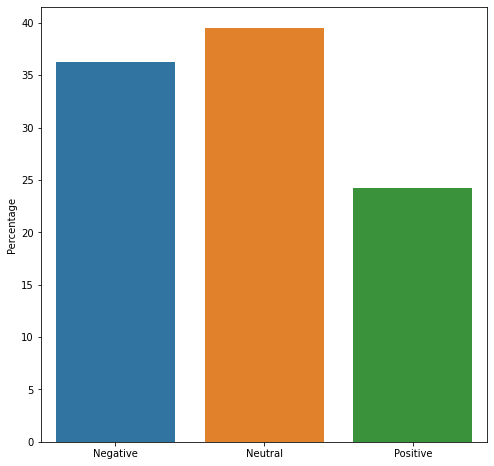

In [ ]:
#################################### Plot sentiment freqeuncies ###############################
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [ ]:
data = pd.read_csv('/content/clean_dirty_words.csv')
data.head()

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,*screams in 25 different languages*,1
1,0.242,0.758,0.000,-0.6249,Families to sue over Legionnaires: More than 4...,0
2,0.000,1.000,0.000,0.0000,Pandemonium In Aba As Woman Delivers Baby With...,1
3,0.492,0.508,0.000,-0.8271,My emotions are a train wreck. My body is a tr...,0
4,0.000,0.905,0.095,0.2960,Alton brown just did a livestream and he burne...,1


In [ ]:
data.dtypes

neg         float64
neu         float64
pos         float64
compound    float64
headline     object
label         int64
dtype: object

In [ ]:
#################################### Do an 85 and 15 %split of data ###################
train_data = data.sample(frac=0.75)
test_data = data.loc[~data.index.isin(train_data.index)]

############################## Save train and test data for future use ######################
#train_data.to_csv('dirty_training.csv')
#test_data.to_csv('dirty_testing.csv')

######################### Load saved train and test data ##########################
#train_data = pd.read_csv('/content/dirty_training.csv')
#test_data = pd.read_csv('/content/dirty_testing.csv')

In [ ]:
X_train = train_data[['neu','compound']].copy()
X_train = X_train.to_numpy()

In [ ]:
y_train = train_data['label'].copy()
y_train = y_train.to_numpy()

In [ ]:
logreg = MVLogisticRegression()

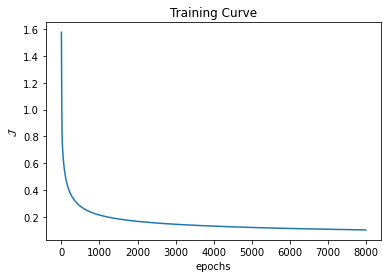

In [ ]:
logreg.fit(X_train, y_train, epochs=8e3, show_curve=True)

In [ ]:
y_hat_train = logreg.predict(X_train)

In [ ]:
accuarcy(y_train,y_hat_train)

0.9849785407725322

In [ ]:
X_test = test_data[['neu','compound']].copy()
X_test = X_test.to_numpy()

In [ ]:
y_test = test_data['label'].copy()
y_test = y_test.to_numpy()

In [ ]:
y_hat_test = logreg.predict(X_test)

In [ ]:
accuarcy(y_test, y_hat_test)

0.9871244635193133

In [ ]:
######################################## Give the user input to analze polarity #####################################

ind_pol_score_given = sia.polarity_scores(sentence)
print(ind_pol_score_given)

{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.4588}


In [ ]:
########################### give it neu and compound #############################
X_person = [[ind_pol_score_given.get('neu'),ind_pol_score_given.get('compound')]]
X_person

[[0.4, 0.4588]]

In [ ]:
############################# Predict sentiment from this info #######################
############################# 0:negative 1:neutral 2:positive ########################
y_hat_person = logreg.predict(X_person)
y_hat_person

array([2])